# Boston House Prices-Advanced Regression Techniques

**Description:** Out of Linear regression, Descision Tree and Random Forest best model used for more accurate housing price prediction.

# 1. EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("C:/Users/Hp/OneDrive/Documents/Real-Estate-Housing-Price-Prediction-Project-main-main/data.csv")

In [3]:
train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Attribute Information
Input features in order:
1) CRIM: per capita crime rate by town

2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

3) INDUS: proportion of non-retail business acres per town

4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]

6) RM: average number of rooms per dwelling

7) AGE: proportion of owner-occupied units built prior to 1940

8) DIS: weighted distances to five Boston employment centres

9) RAD: index of accessibility to radial highways

10) TAX: full-value property-tax rate per $10,000 [$/10k]

11) PTRATIO: pupil-teacher ratio by town

12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

13) LSTAT: % lower status of the population


Output variable:

1) MEDV: Median value of owner-occupied homes in $1000's [k$]

In [5]:
train.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

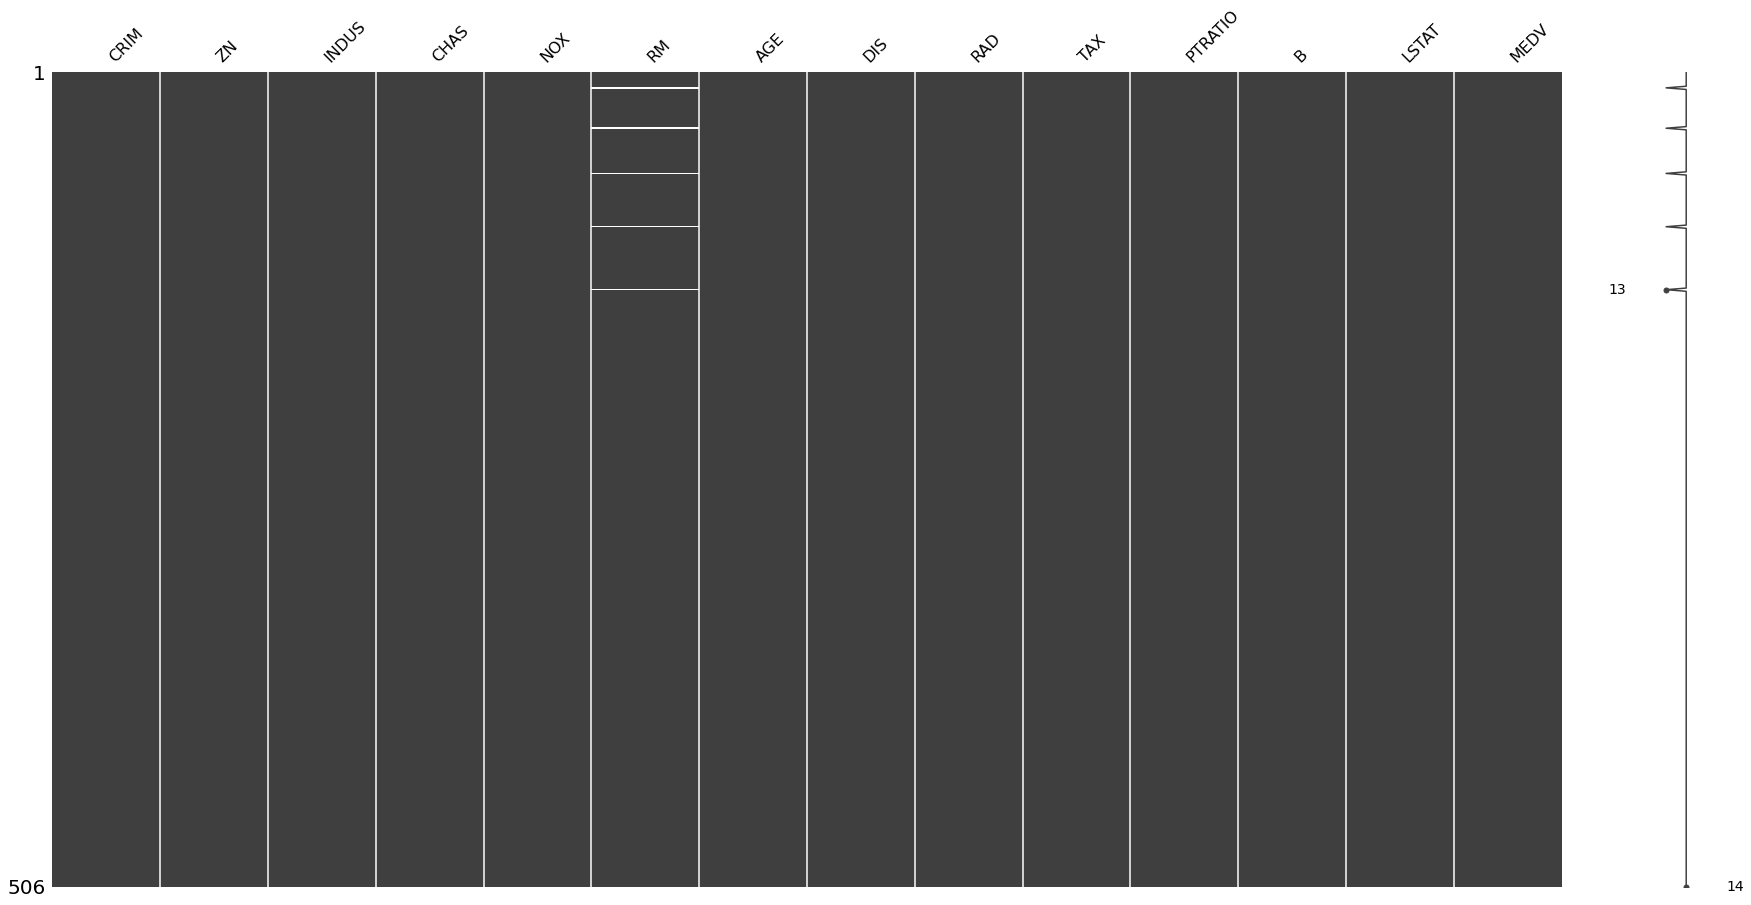

In [6]:
#Missing values
import missingno
missingno.matrix(train, figsize=(30,15))

**Note:** As there is some values are missing in RM feature. RM have a float dtype. So here we fill this null values using mean.

In [7]:
tn = train.copy()

In [8]:
tn.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
tn['RM'] = tn['RM'].fillna(tn['RM'].mean())

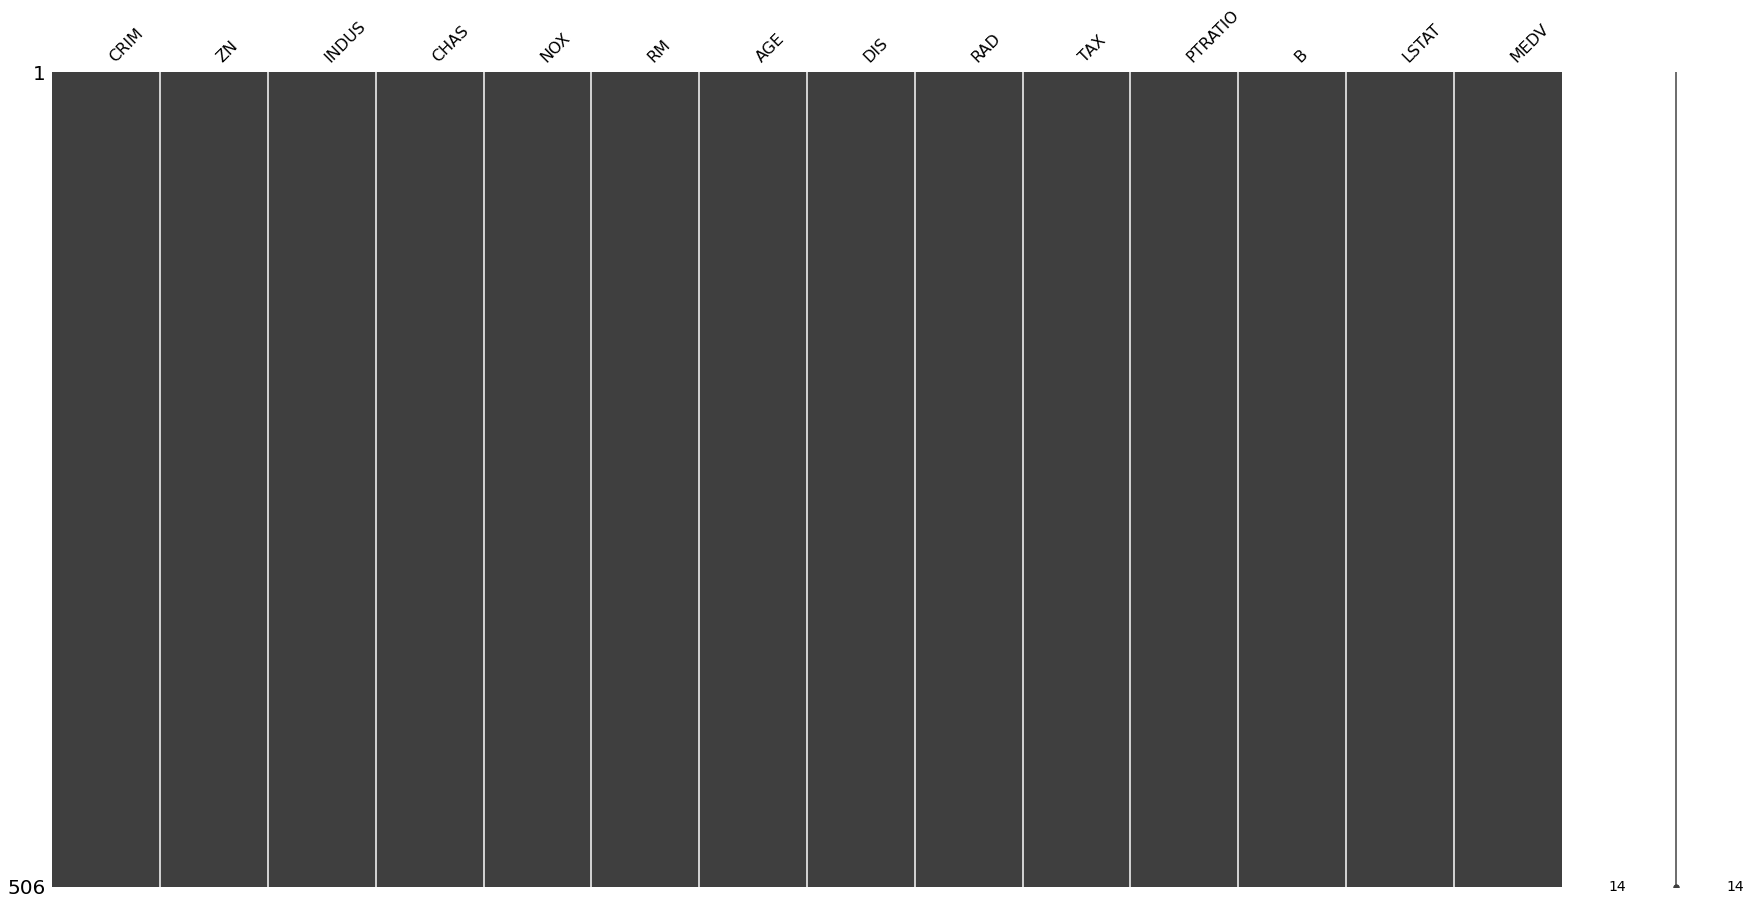

In [10]:
missingno.matrix(tn, figsize=(30,15))

In [11]:
tn.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702085,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000253F16D10A0>,
      dtype=object)

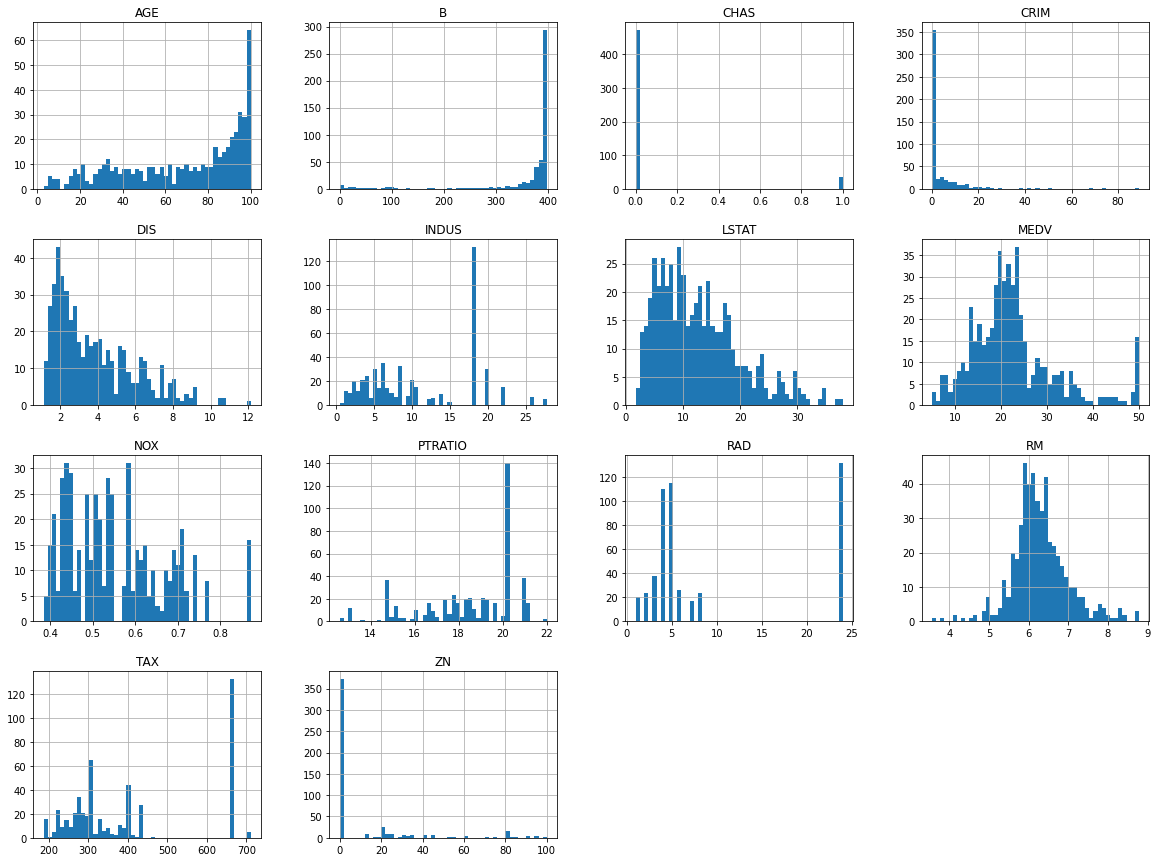

In [12]:
#  For plotting histogram
tn.hist(bins=50, figsize=(20, 15))

## Looking for Correlations

In [13]:
corr_matrix = tn.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695375
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000253F09B8130>,
      dtype=object)

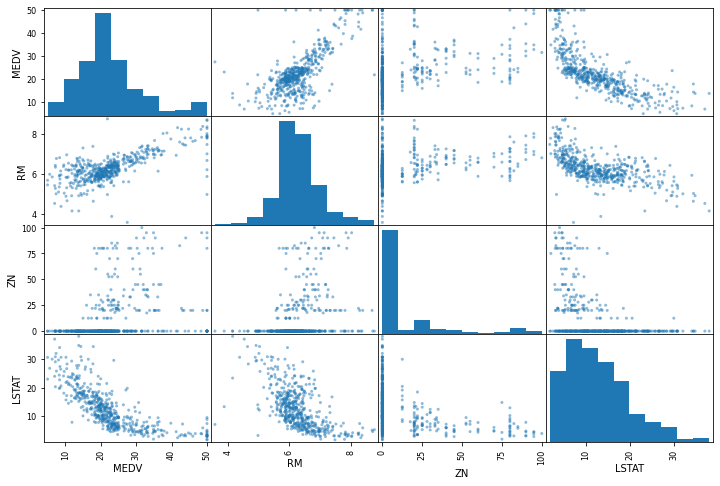

In [14]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(tn[attributes], figsize = (12,8))

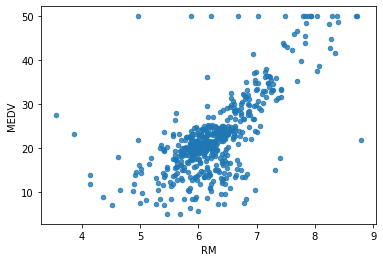

In [17]:
tn.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Trying out Attribute combinations

In [18]:
tn["TAXRM"] = tn['TAX']/tn['RM']

In [19]:
tn.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


## Train-Test Splitting

In [21]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(tn, test_size=0.25, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 379
Rows in test set: 127



In [31]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index, test_index in split.split(tn, tn['CHAS']):
    strat_train_set = tn.loc[train_index]
    strat_test_set = tn.loc[test_index]

In [32]:
strat_test_set['CHAS'].value_counts()

0    118
1      9
Name: CHAS, dtype: int64

In [34]:
strat_train_set['CHAS'].value_counts()

0    353
1     26
Name: CHAS, dtype: int64

In [35]:
tn1 = strat_train_set.copy()

In [36]:
tn1 = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"]

In [71]:
tt1 = strat_test_set.drop("MEDV", axis=1)
housing_labels_tt = strat_test_set["MEDV"]

In [37]:
housing_labels.count()

379

In [38]:
tn1.count()

CRIM       379
ZN         379
INDUS      379
CHAS       379
NOX        379
RM         379
AGE        379
DIS        379
RAD        379
TAX        379
PTRATIO    379
B          379
LSTAT      379
TAXRM      379
dtype: int64

In [77]:
tt1.count()

CRIM       127
ZN         127
INDUS      127
CHAS       127
NOX        127
RM         127
AGE        127
DIS        127
RAD        127
TAX        127
PTRATIO    127
B          127
LSTAT      127
TAXRM      127
dtype: int64

# 2. Machine Learning Algorithms

## Creating a Pipeline

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [62]:
housing_num_tr = sc.fit_transform(tn1)

In [63]:
housing_num_tr.shape

(379, 14)

In [64]:
housing_labels.shape

(379,)

## Selecting a desired model for  Real Estates based on RMSE value

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [68]:
some_data = tn1.iloc[:]

In [69]:
some_labels = housing_labels.iloc[:]

In [78]:
housing_predictions = model.predict(tt1)

In [75]:
housing_labels_tt.head()

380    10.4
263    31.0
322    20.4
176    23.2
43     24.7
Name: MEDV, dtype: float64

## Evaluating the model

In [79]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(housing_labels_tt, housing_predictions)
rmse = np.sqrt(mse)

In [80]:
rmse

9.276691658875933

## Using better evaluation technique - Cross Validation

In [81]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [82]:
rmse_scores

array([3.37113992, 2.80581501, 5.37208282, 3.26584337, 3.17915473,
       3.47338816, 5.41116087, 2.98022538, 3.73564899, 2.75351692])

In [83]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [84]:
print_scores(rmse_scores)

Scores: [3.37113992 2.80581501 5.37208282 3.26584337 3.17915473 3.47338816
 5.41116087 2.98022538 3.73564899 2.75351692]
Mean:  3.6347976169347627
Standard deviation:  0.9227911996877974


## Saving the model

In [85]:
from joblib import dump, load
dump(model, 'Dragon.joblib') 

['Dragon.joblib']

## Testing the model on test data

In [87]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = sc.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[20.188 31.006 21.494 21.455 24.442 26.492 22.697 21.841 34.741 20.94
 17.527 21.947 24.101 24.576 44.805 20.569 18.531 19.141 11.295 14.298
 41.271 14.411 24.416 20.472 14.714 25.962 37.364 20.724 21.092 11.686
 40.36  12.703 24.292 21.071 24.354 25.525 19.867 15.707 19.511 32.636
 20.899 20.135 36.626 20.431 28.726 14.36  31.13  24.437 21.663 22.938
 14.826 14.405 30.022 20.492 18.391 21.231 14.221 20.448 18.897 19.363
 27.588 23.121 23.215 27.573 33.801 32.625 17.474 20.91  10.564 14.702
 13.162 18.81  10.969 41.074 20.896 24.313  7.376 16.33  28.764 20.268
 10.102  9.69  10.254  8.816 24.257 20.069 21.037 35.155 41.519 20.238
 31.491 17.341 23.333 19.874 19.571 19.634 20.101 25.302 46.995 19.826
 11.639 22.443 29.613 20.774 22.454 10.697 21.044 17.66  42.368 14.069
 33.004 32.766 34.024 14.428 27.339 29.695 19.439 20.146 16.112 26.237
 20.052 19.299 42.324 21.659 19.639 33.193 22.769] [10.4, 31.0, 20.4, 23.2, 24.7, 30.1, 22.2, 20.6, 34.9, 21.1, 18.0, 19.8, 23.3, 27.9, 41.7, 20.4, 1

In [88]:
final_rmse

3.2748398181660217

In [92]:
X_test_prepared[0]

array([10.3804929 , -0.49345836,  1.00506417, -0.27139342,  0.96273465,
        0.96107166,  0.82757651, -1.13035786,  1.66162538,  1.52599595,
        0.82676201,  0.45205498,  0.61544489,  0.89908361])

## Using the model

In [93]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib') 
features = np.array([[10.3804929 , -0.49345836,  1.00506417, -0.27139342,  0.96273465,
        0.96107166,  0.82757651, -1.13035786,  1.66162538,  1.52599595,
        0.82676201,  0.45205498,  0.61544489,  0.89908361]])
model.predict(features)

array([20.188])

# Thank You!